# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes (whole world)
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}?q={city}&units=metric&appid={weather_api_key}'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | west island
Processing Record 3 of Set 1 | dampit
Processing Record 4 of Set 1 | port shepstone
Processing Record 5 of Set 1 | brokopondo
Processing Record 6 of Set 1 | sosnovo-ozerskoye
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 9 of Set 1 | chipinge
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | barra de santo antonio
Processing Record 13 of Set 1 | kununurra
Processing Record 14 of Set 1 | porto velho
Processing Record 15 of Set 1 | itoman
Processing Record 16 of Set 1 | lulea
Processing Record 17 of Set 1 | brookings
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | margaret river
Processing Record 20 of Set 1 | blackmans bay
Processing Record 21 of Set 1 | likiep
Processing

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,11.06,54,75,16.98,CL,1733158399
1,west island,-12.1568,96.8225,27.99,94,100,2.57,CC,1733158400
2,dampit,-8.2116,112.7493,22.48,98,100,0.55,ID,1733158402
3,port shepstone,-30.7414,30.4550,21.10,81,100,2.58,ZA,1733158403
4,brokopondo,4.7500,-55.1667,29.81,62,99,3.72,SR,1733158404


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,11.06,54,75,16.98,CL,1733158399
1,west island,-12.1568,96.8225,27.99,94,100,2.57,CC,1733158400
2,dampit,-8.2116,112.7493,22.48,98,100,0.55,ID,1733158402
3,port shepstone,-30.7414,30.4550,21.10,81,100,2.58,ZA,1733158403
4,brokopondo,4.7500,-55.1667,29.81,62,99,3.72,SR,1733158404


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

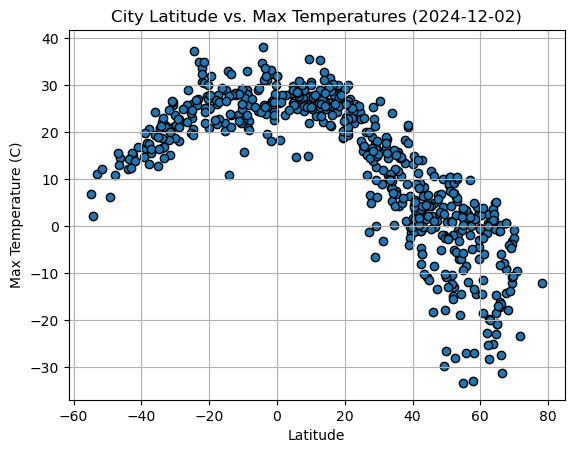

In [24]:
# Build scatter plot for latitude vs. temperature

latitude_x = city_data_df['Lat']
temperature_y = city_data_df['Max Temp']

plt.scatter(latitude_x, temperature_y, edgecolors='black')

# Incorporate the other graph properties

plt.grid()
plt.title("City Latitude vs. Max Temperatures (2024-12-02)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

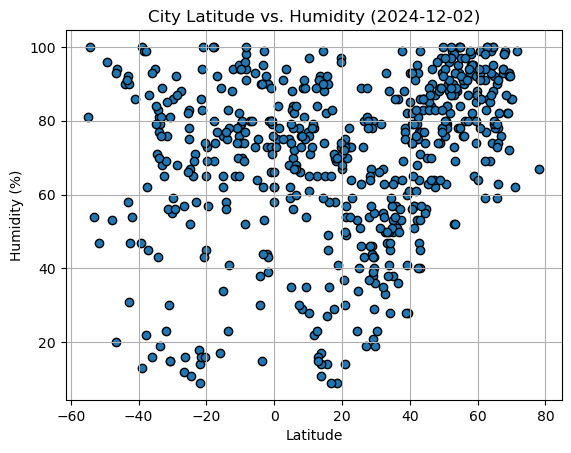

In [25]:
# Build the scatter plots for latitude vs. humidity
latitude_x = city_data_df['Lat']
humidity_y = city_data_df['Humidity']

plt.scatter(latitude_x, humidity_y, edgecolors='black')

# Incorporate the other graph properties

plt.grid()
plt.title("City Latitude vs. Humidity (2024-12-02)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

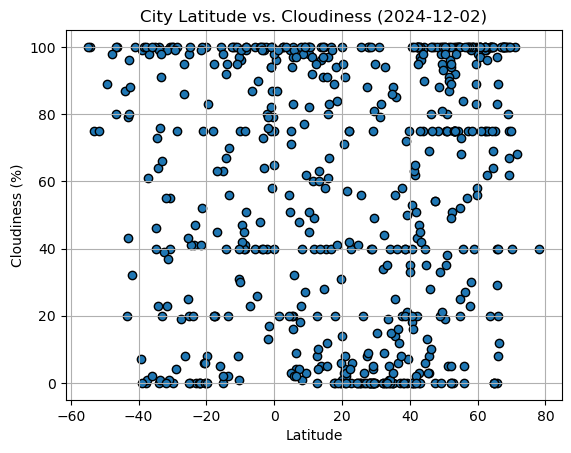

In [26]:
# Build the scatter plots for latitude vs. cloudiness
latitude_x = city_data_df['Lat']
cloudiness_y = city_data_df['Cloudiness']

plt.scatter(latitude_x, cloudiness_y, edgecolors='black')

# Incorporate the other graph properties

plt.grid()
plt.title("City Latitude vs. Cloudiness (2024-12-02)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

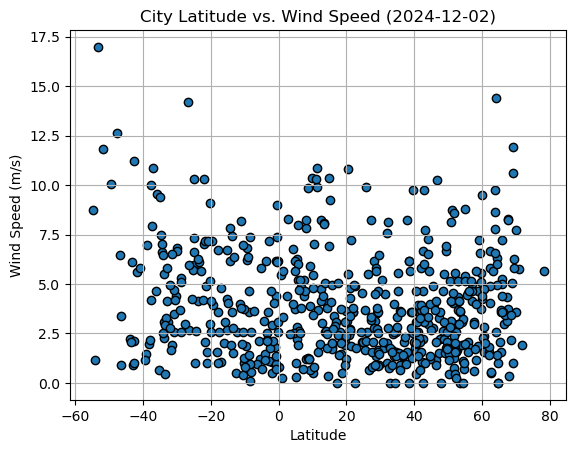

In [27]:
# Build the scatter plots for latitude vs. wind speed
latitude_x = city_data_df['Lat']
wind_speed_y = city_data_df['Wind Speed']

plt.scatter(latitude_x, wind_speed_y, edgecolors='black')

# Incorporate the other graph properties

plt.grid()
plt.title("City Latitude vs. Wind Speed (2024-12-02)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# Define a function to create Linear Regression plots

def linear_regress(x_axis, y_axis, x, y):

	# Linear Regression Plots Calculation

	slope, intercept, r_value, p_value, std_err = linregress(x_axis, y_axis)
	regress_values = slope * x_axis + intercept

	# Chart Plot & Regression Line

	plt.scatter(x_axis, y_axis, edgecolors='black')
	plt.plot(x_axis, regress_values, color='red')

	# Format and display Regression Line Equation

	regress_equation = f"y = {round(slope, 2)}x + {round(intercept,2)}"
	plt.text(x, y, regress_equation, fontsize=15, color='red')
	
	# Chart Formatting

	plt.title(f"Latititude vs. {str(y_axis.name)}")
	plt.xlabel('Latitude')
	plt.ylabel(y_axis.name)
	
	# Print r squared value
	
	print(f"The r^2-value is: {r_value**2}")

	# Show Chart

	plt.show()


In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,brokopondo,4.7500,-55.1667,29.81,62,99,3.72,SR,1733158404
5,sosnovo-ozerskoye,52.5249,111.5418,-27.98,99,51,1.67,RU,1733158405
9,georgetown,5.4112,100.3354,26.96,84,20,2.24,MY,1733158230
13,itoman,26.1247,127.6694,20.01,73,20,2.57,JP,1733158415
14,lulea,65.5842,22.1547,-0.96,59,0,3.60,SE,1733158416


In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,11.06,54,75,16.98,CL,1733158399
1,west island,-12.1568,96.8225,27.99,94,100,2.57,CC,1733158400
2,dampit,-8.2116,112.7493,22.48,98,100,0.55,ID,1733158402
3,port shepstone,-30.7414,30.4550,21.10,81,100,2.58,ZA,1733158403
6,grytviken,-54.2811,-36.5092,2.21,100,100,1.15,GS,1733158406


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7335225548294493


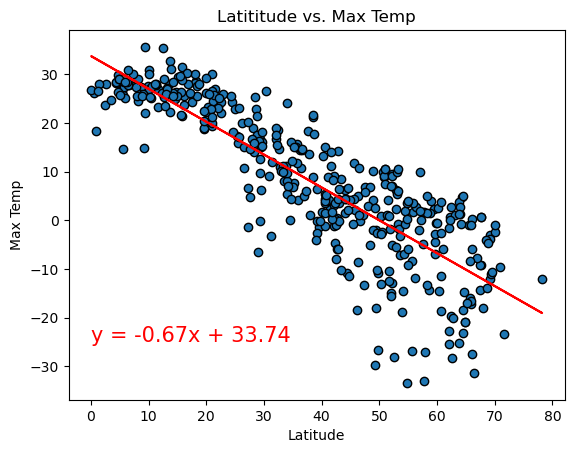

In [32]:
# Linear regression on Northern Hemisphere

linear_regress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 0, -25)


The r^2-value is: 0.5012495073102532


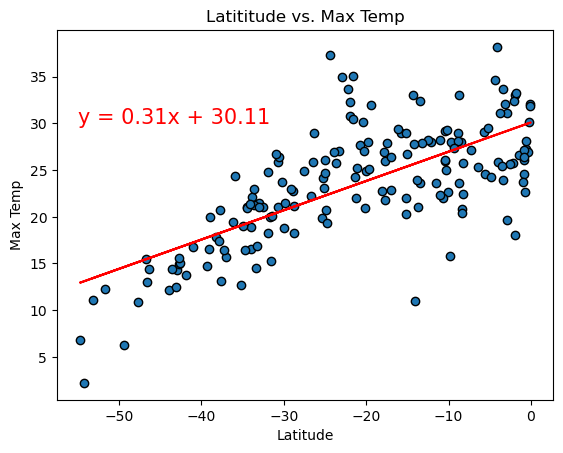

In [33]:
# Linear regression on Southern Hemisphere

linear_regress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], -55, 30)


**Discussion about the linear relationship:**  Looking at the points plotted along side the regression line for the Northern and Southern Hemispheres, there is a clear correlation between a city's maximum temperature and its geographic latitude. According to the regression lines plotted, the Temperatures are generally seen to increase as you move closer to the equator and decrease the farther you are from it, not without some exceptions. This is further supported by the R-squared values of 0.73 for the Northern Hemisphere and 0.5 for the Southern Hemisphere, which indicates that the data has moderate to strong correlations.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.17514683979914777


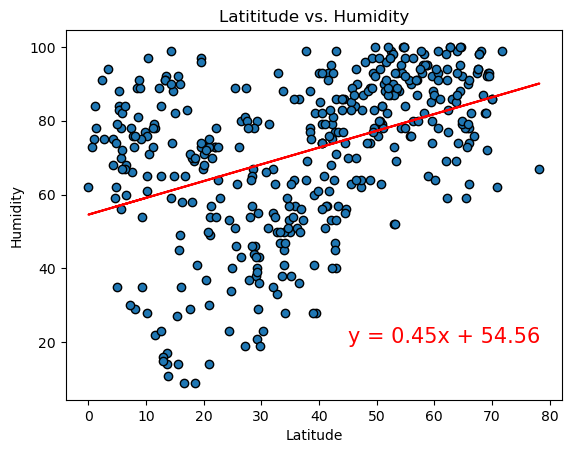

In [34]:
# Northern Hemisphere

linear_regress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 45, 20)


The r^2-value is: 0.00670632804137581


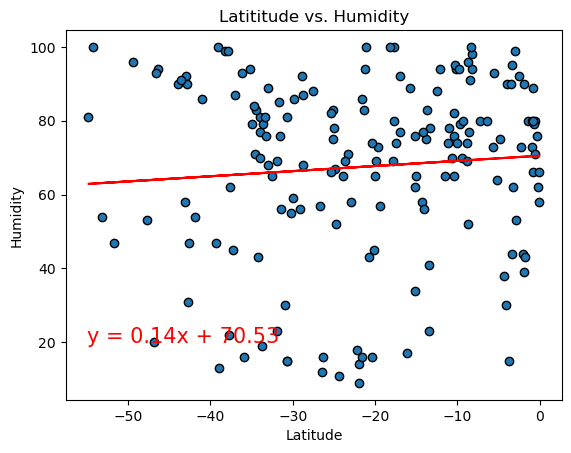

In [35]:
# Southern Hemisphere

linear_regress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], -55, 20)


**Discussion about the linear relationship:** Though the argument can be made to some extent (at least perceptually) to constitute the correlation between the regression line and the data points present in the Northern and Southern Hemisphere Charts for the Humididty levels according to Latitude. Considering the current r squared values of 0.17 for the Northern Data and 0.006 for the Southern, the data points to fact that no real actionable correlation can be made in between these data points. In order to improve the findings of this result, we may want to explore limiting/ grouping the city data points by altitude as much as we do for Latitude in this project.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.04746420176575798


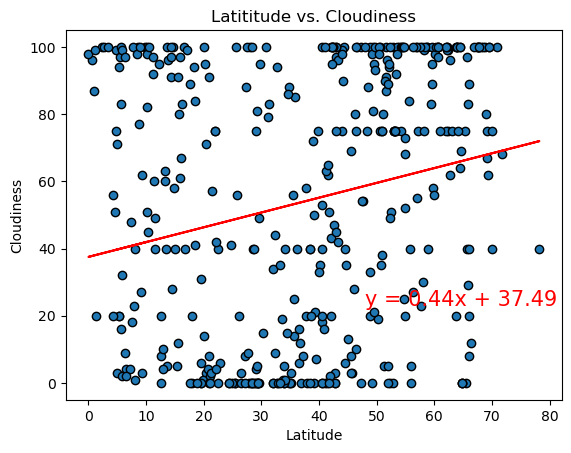

In [36]:
# Northern Hemisphere

linear_regress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 48, 23)


The r^2-value is: 0.00035904529091338995


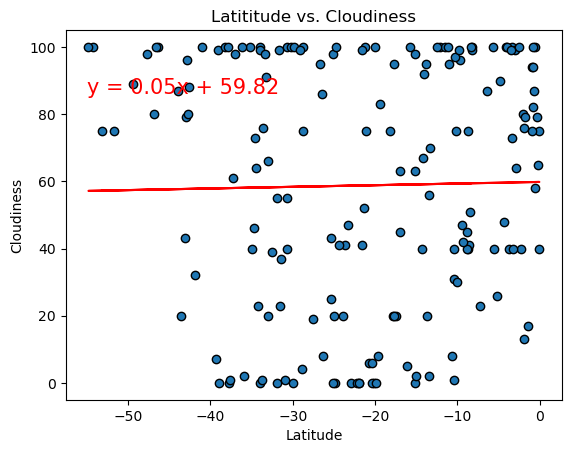

In [37]:
# Southern Hemisphere

linear_regress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], -55, 86)


**Discussion about the linear relationship:** Looking at the datapoints in both Latitude vs Cloudiness charts for the Northern Hemisphere and the Southern, it is immediately evident that there is very limited correlation between the Cloudiness of an area and the geographical Latitude. This may though stem from the fact that a Scatter Chart or at the very least the calculation of the Cloudiness input is possibly not the best representation of this data as 'Cloudiness' as a metric is quite often more recorded as the extemes (like its CLOUDY or SUNNY) which makes making a range based correlation harder as the points end up more often in the extremes such as 0 and 100 in this case.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0001470016094858055


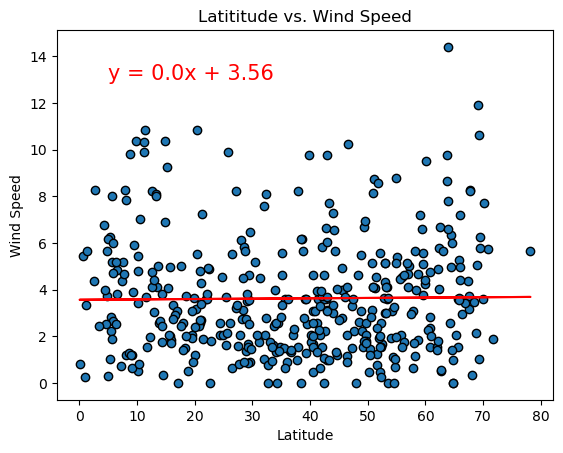

In [38]:
# Northern Hemisphere

linear_regress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 5, 13)


The r^2-value is: 0.09578473613073347


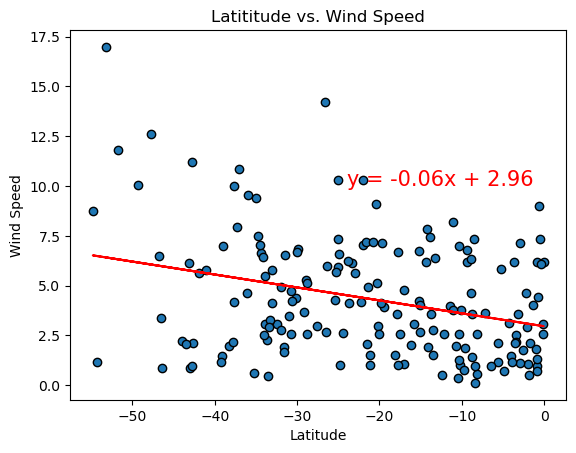

In [39]:
# Southern Hemisphere

linear_regress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], -24, 10)


**Discussion about the linear relationship:** Considering the datapoints in the Northern and Southern Charts for Wind speeds in respects to the Latitude, we can in fact to some degree see a slight correlation at least visually pointing to a slight shift of higher windspeeds as you move further from the equator. Though the regression line points to this conclusion, considering the variance/ r squared score of this data being only around 0.0001 and 0.095 respectively, the data definitely points to almost no real acctionable correlation for windspeeds when only measuring by Latitude. 

p.s. As to why the 0.095 r squared score for the southern hemisphere is being generally overlooked, due to the nature/ structure of the globe/ continents, any city within the southern hemisheres has a much higher likelyhood to exist closer to the seas side as there is comparatively less land and a higher ratio of island based nations. Due to this its natural to assume some level of correlation in data as the sampled data may include this limitation. 